# Import Necessary Libraries

In [1]:
pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install --upgrade pip setuptools wheel

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [4]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load your dataset
file_path = "C:\\Users\\SOL-62\\Desktop\\Financial Risk Analysis\\financial_risk_analysis_large.csv"
data = load_data(file_path)

In [5]:
data.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0


In [7]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Create a boolean mask where True indicates the presence of negative values in numerical columns
mask = (data[numerical_columns] < 0).any(axis=1)

# Filter out rows with negative values in numerical columns
data_cleaned = data[~mask]

In [8]:
data_cleaned.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,Self-Employed,Widowed,0,Doctorate,Other,...,12,726,7574,21769,853,253,303,213,33,0
8,514,72526,19221,29,56,Self-Employed,Single,0,Bachelor,Other,...,35,440,6477,37276,769,451,471,40,165,1
9,630,51364,24451,21,25,Self-Employed,Married,2,High School,Mortgage,...,19,197,5637,9001,1531,478,138,211,123,1


# Create sample data from large Dataset

In [ ]:
# Create a sample dataframe with the first 1000 rows
data_sample = data.head(1000)

# Performing EDA (Exploratory Data Analysis) 

## Statistical Summary

In [9]:
def basic_summary(data):
    print("Shape of the data:", data.shape)
    print("Data types:\n", data.dtypes)
    print("First few rows:\n", data.head())
    print("Summary statistics:\n", data.describe())
    print("Missing values:\n", data.isnull().sum())
    print("Unique value counts per column:\n", data.nunique())

basic_summary(data_cleaned)

Shape of the data: (620238, 51)
Data types:
 CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
Total

## Distribution of Numerical Variables

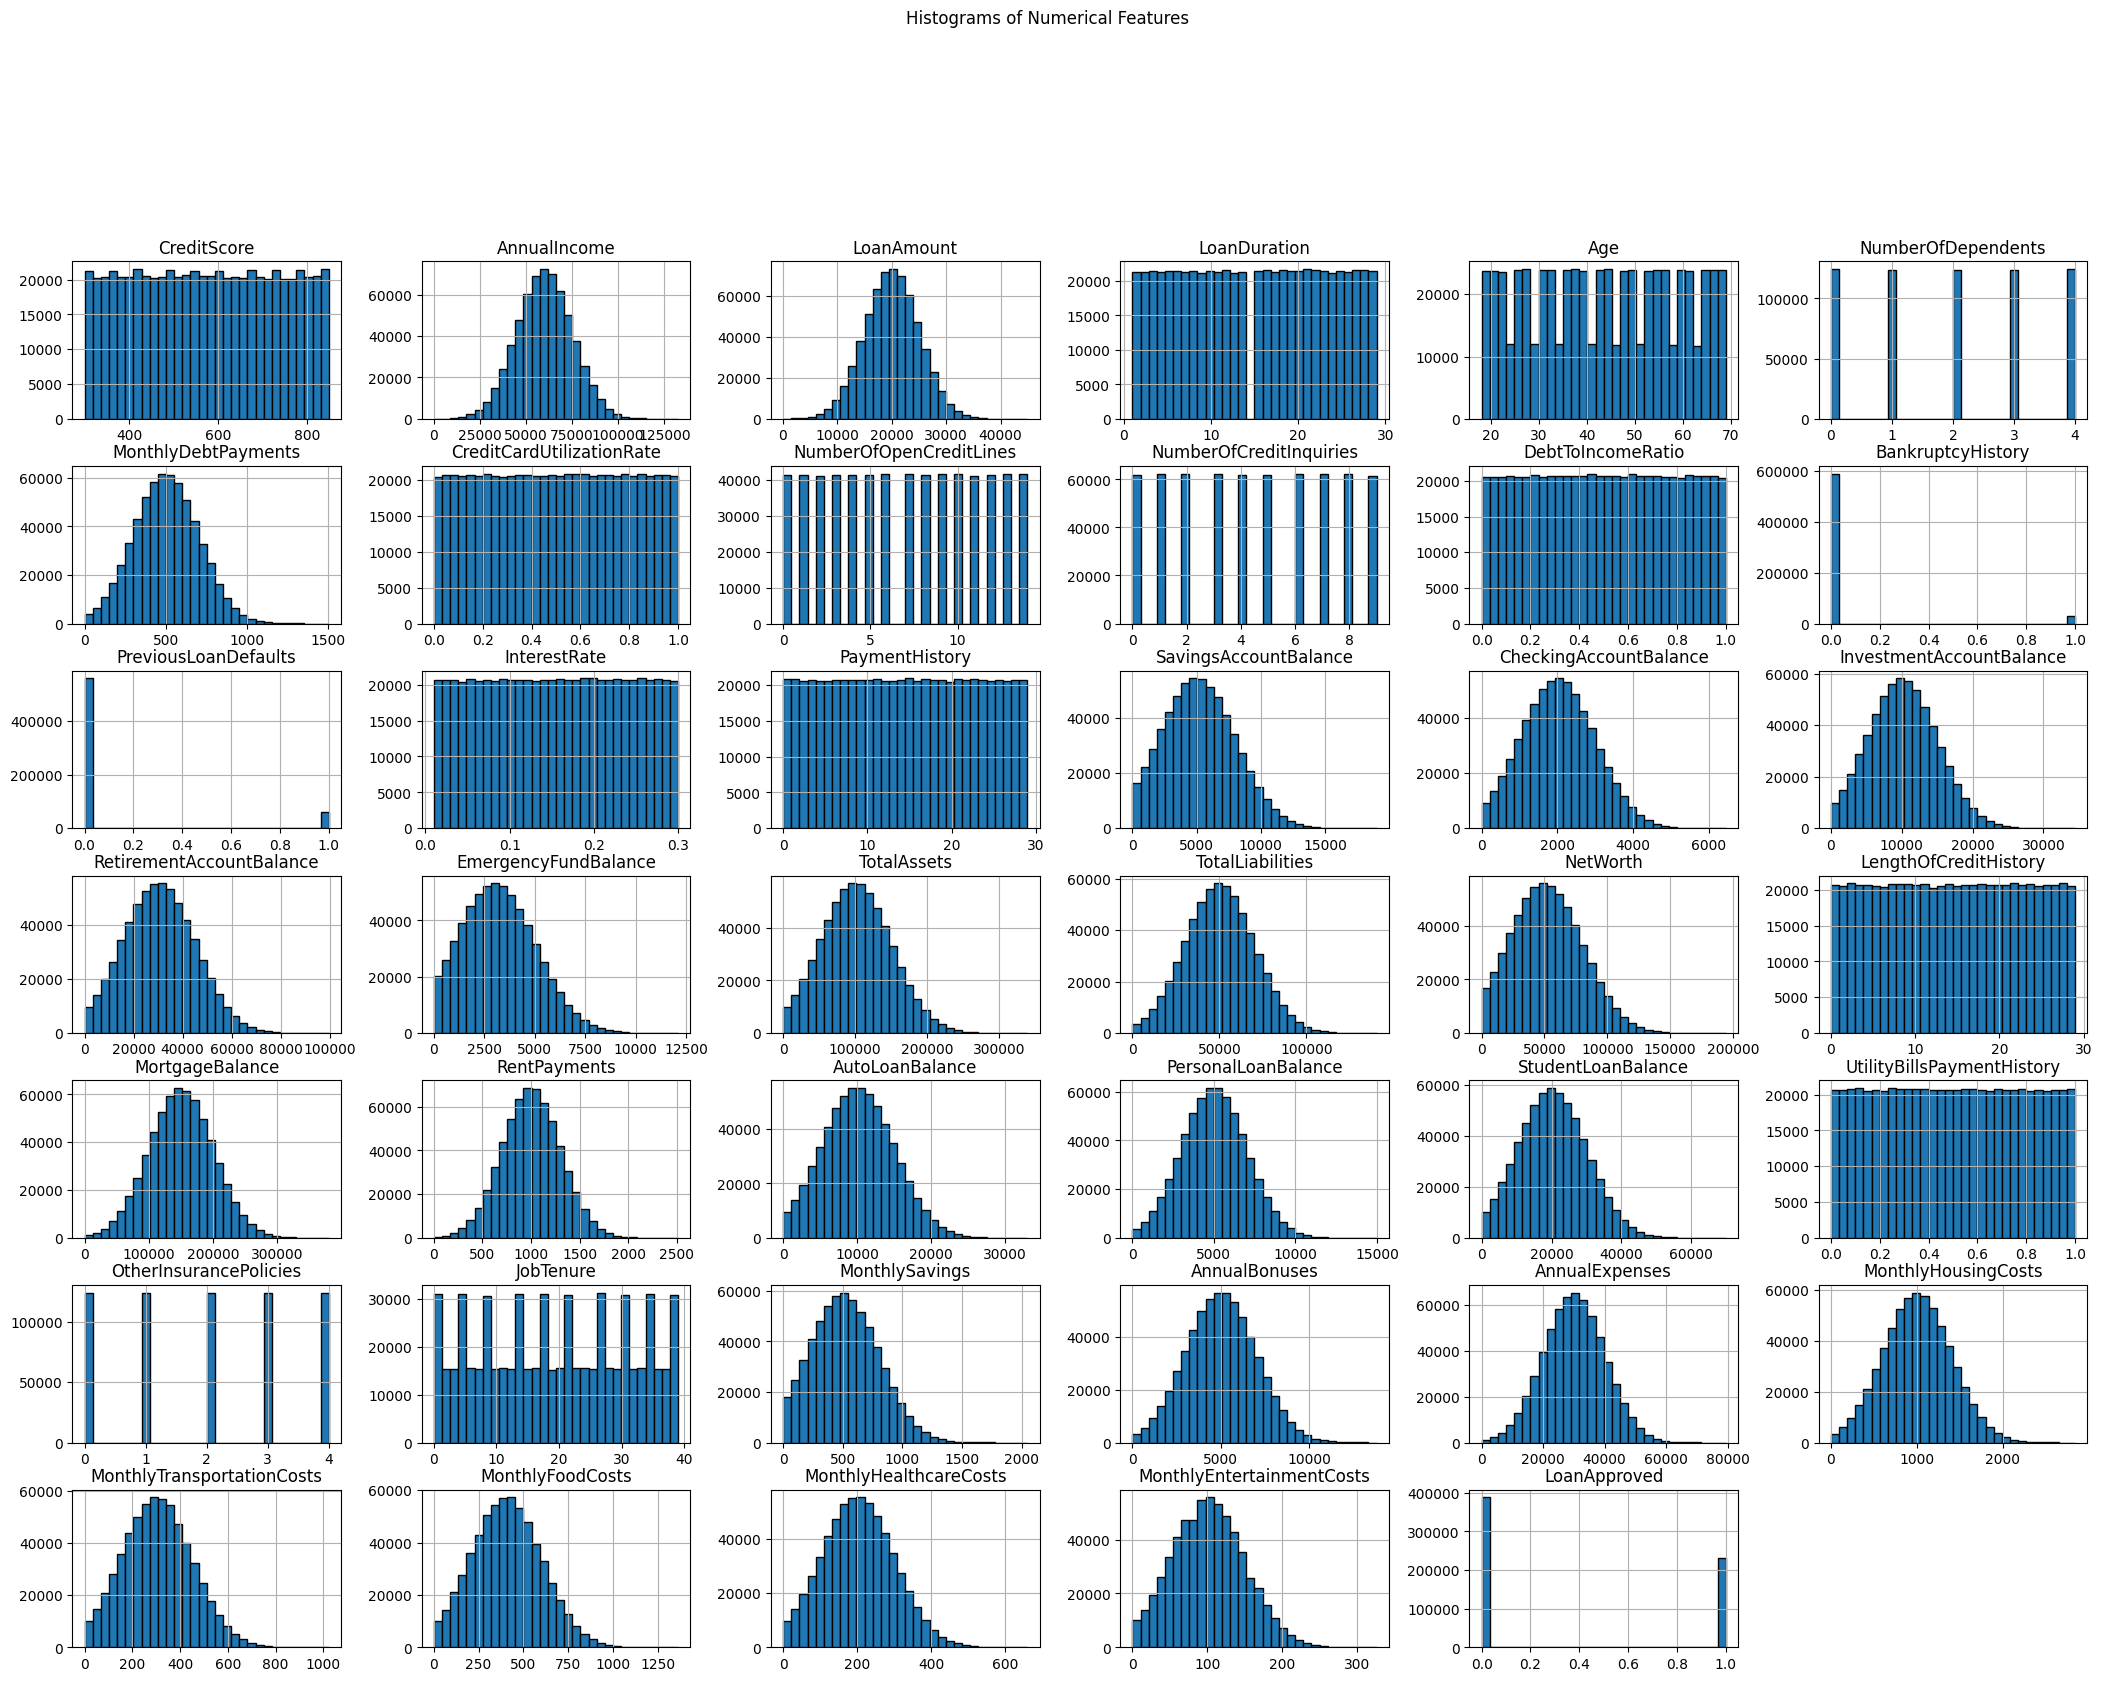

In [10]:
def plot_histograms(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    numeric_data.hist(figsize=(26, 18), bins=30, edgecolor='black')
    plt.suptitle('Histograms of Numerical Features', y=1.02)
    plt.show()

plot_histograms(data_cleaned)

## Boxplots for Numerical Variables

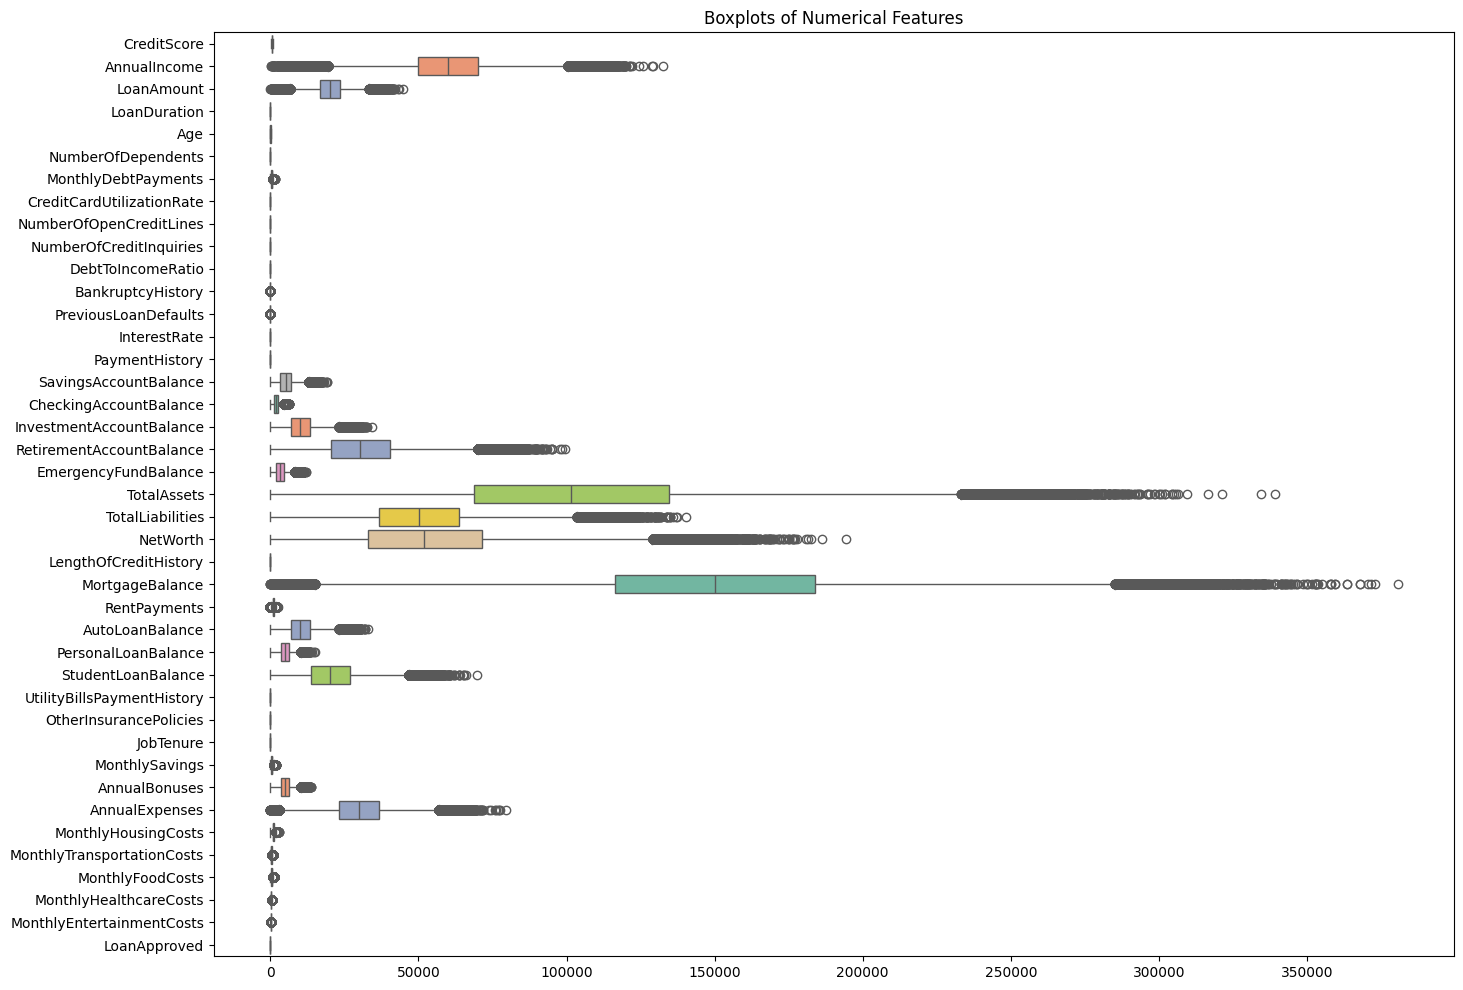

In [11]:
def plot_boxplots(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=numeric_data, orient="h", palette="Set2")
    plt.title('Boxplots of Numerical Features')
    plt.show()

plot_boxplots(data_cleaned)

## Count Plots for Categorical Variables

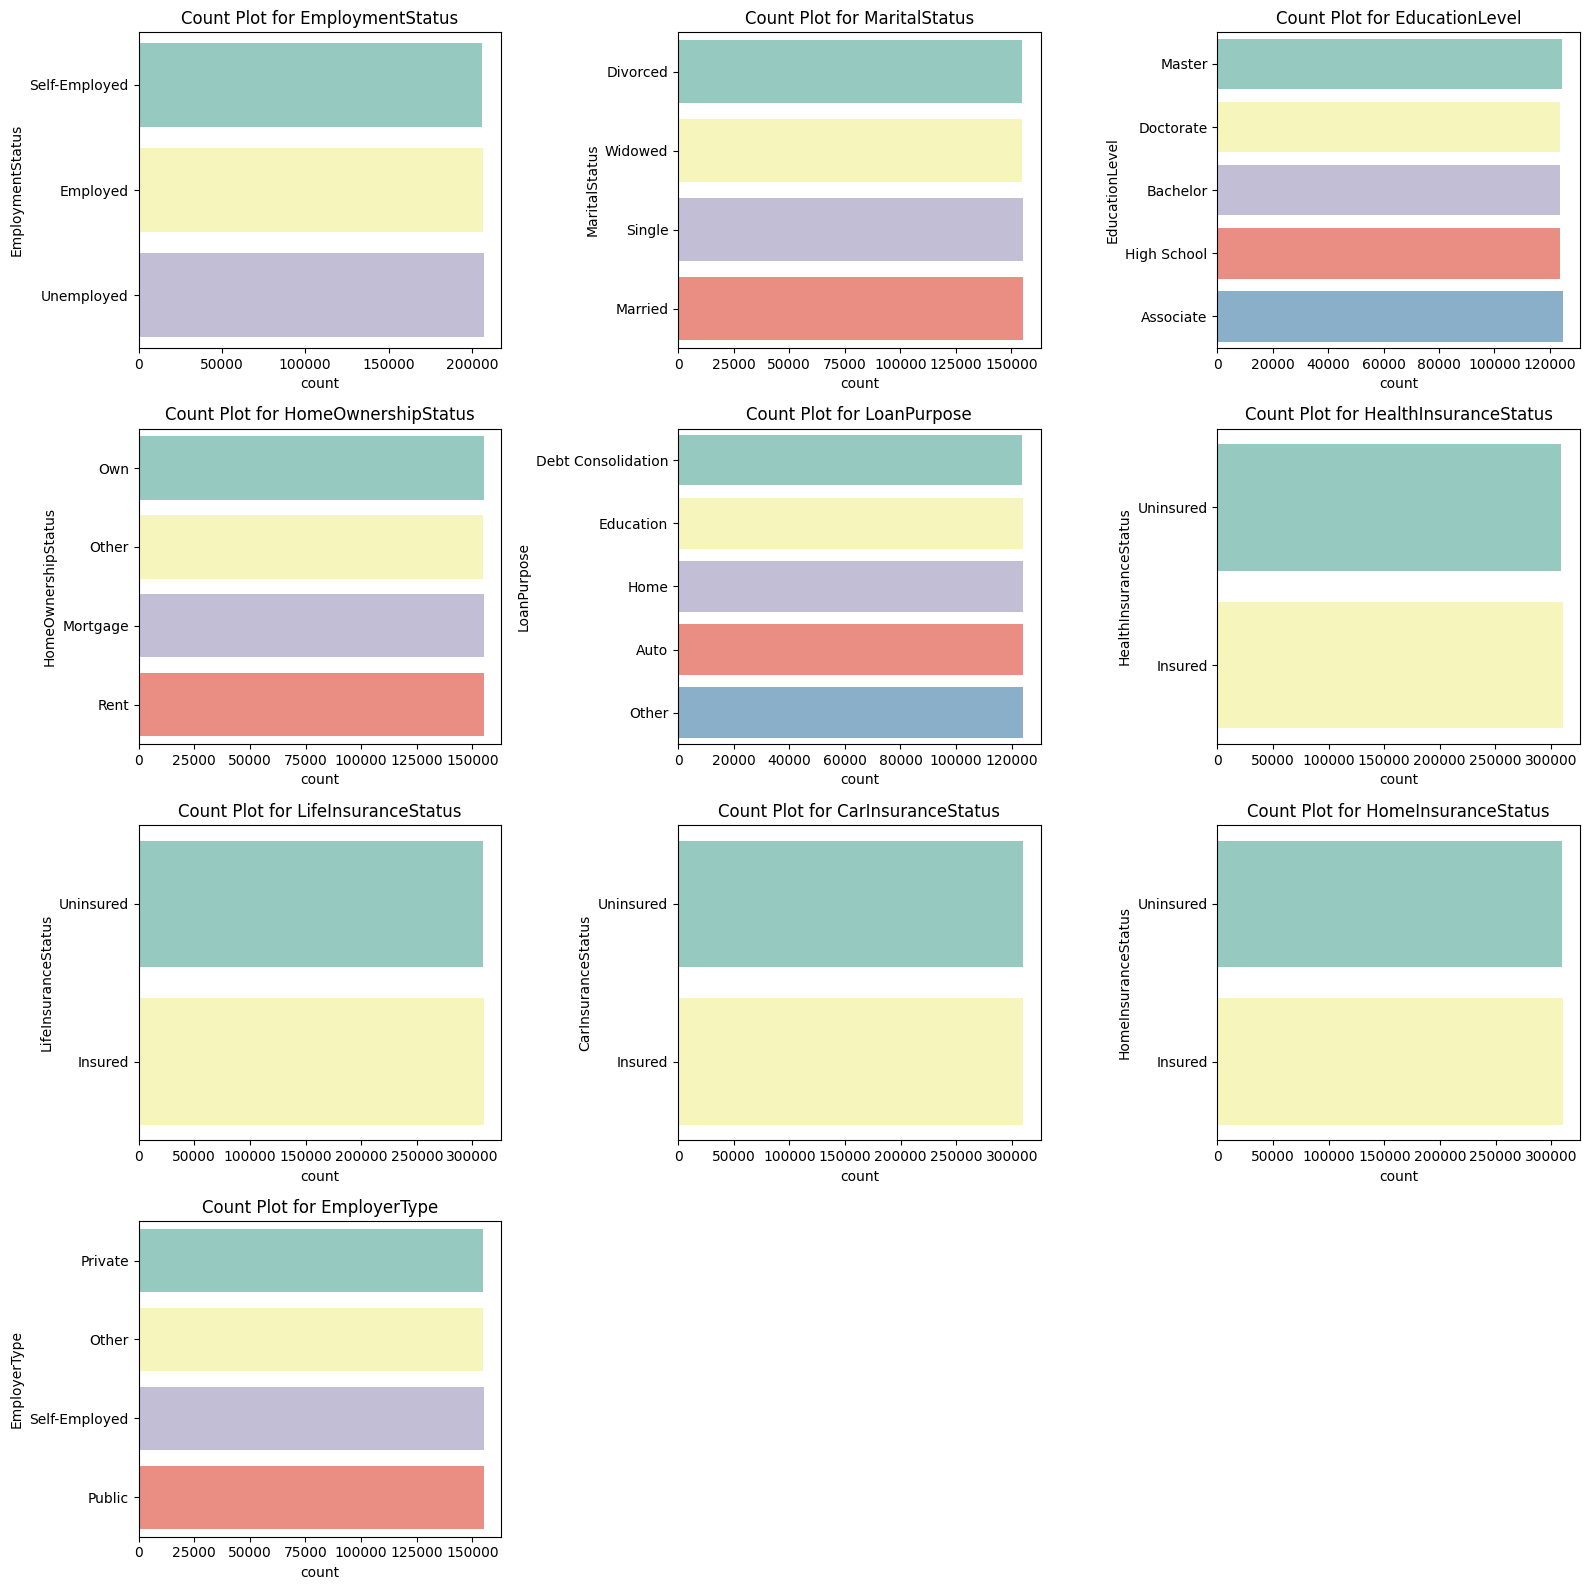

In [12]:
def plot_countplots(data):
    # Select only categorical columns
    categorical_data = data.select_dtypes(include=['object', 'category'])
    
    # Calculate the number of rows and columns needed
    num_plots = len(categorical_data.columns)
    rows = (num_plots // 3) + (num_plots % 3 > 0)
    
    plt.figure(figsize=(16, rows * 4))  # Adjust figure height based on number of rows
    
    for i, column in enumerate(categorical_data.columns, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(y=column, data=categorical_data, palette="Set3", hue=column, dodge=False, legend=False)
        plt.title(f'Count Plot for {column}')
    
    plt.tight_layout()
    plt.show()

plot_countplots(data_cleaned)

##  Scatter Plot for Key Relationships

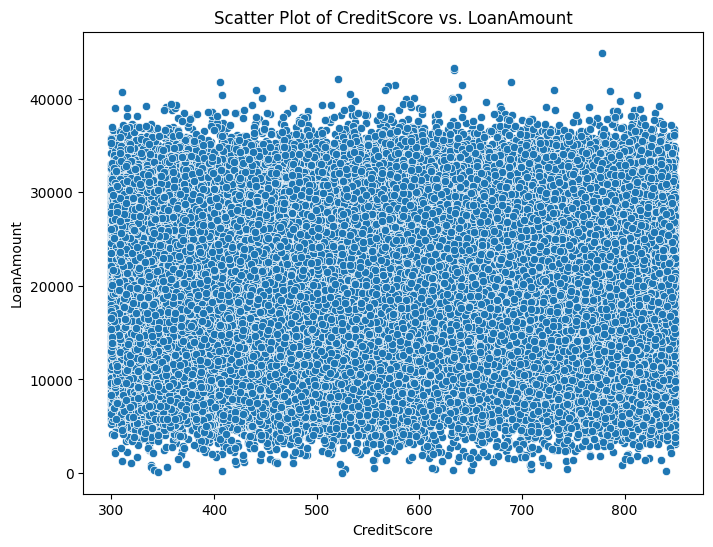

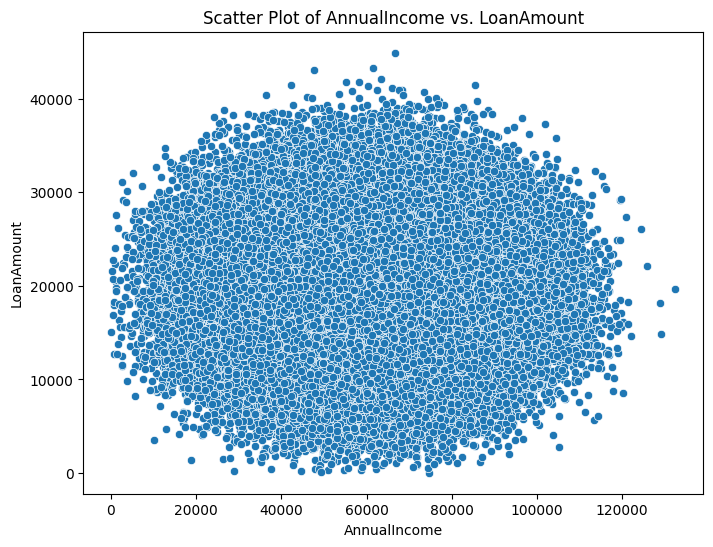

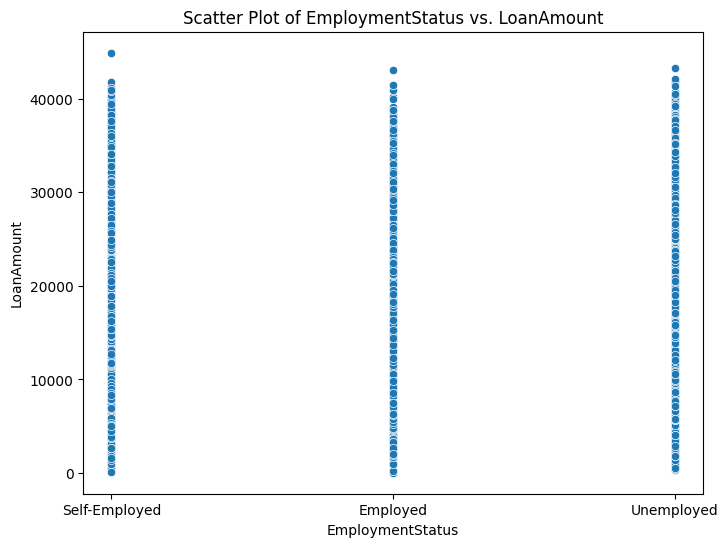

In [13]:
def plot_scatter(data, x_var, y_var):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=data)
    plt.title(f'Scatter Plot of {x_var} vs. {y_var}')
    plt.show()

plot_scatter(data_cleaned, 'CreditScore', 'LoanAmount')
plot_scatter(data_cleaned, 'AnnualIncome', 'LoanAmount')
plot_scatter(data_cleaned, 'EmploymentStatus', 'LoanAmount')

## Correlation Matrix for All Features

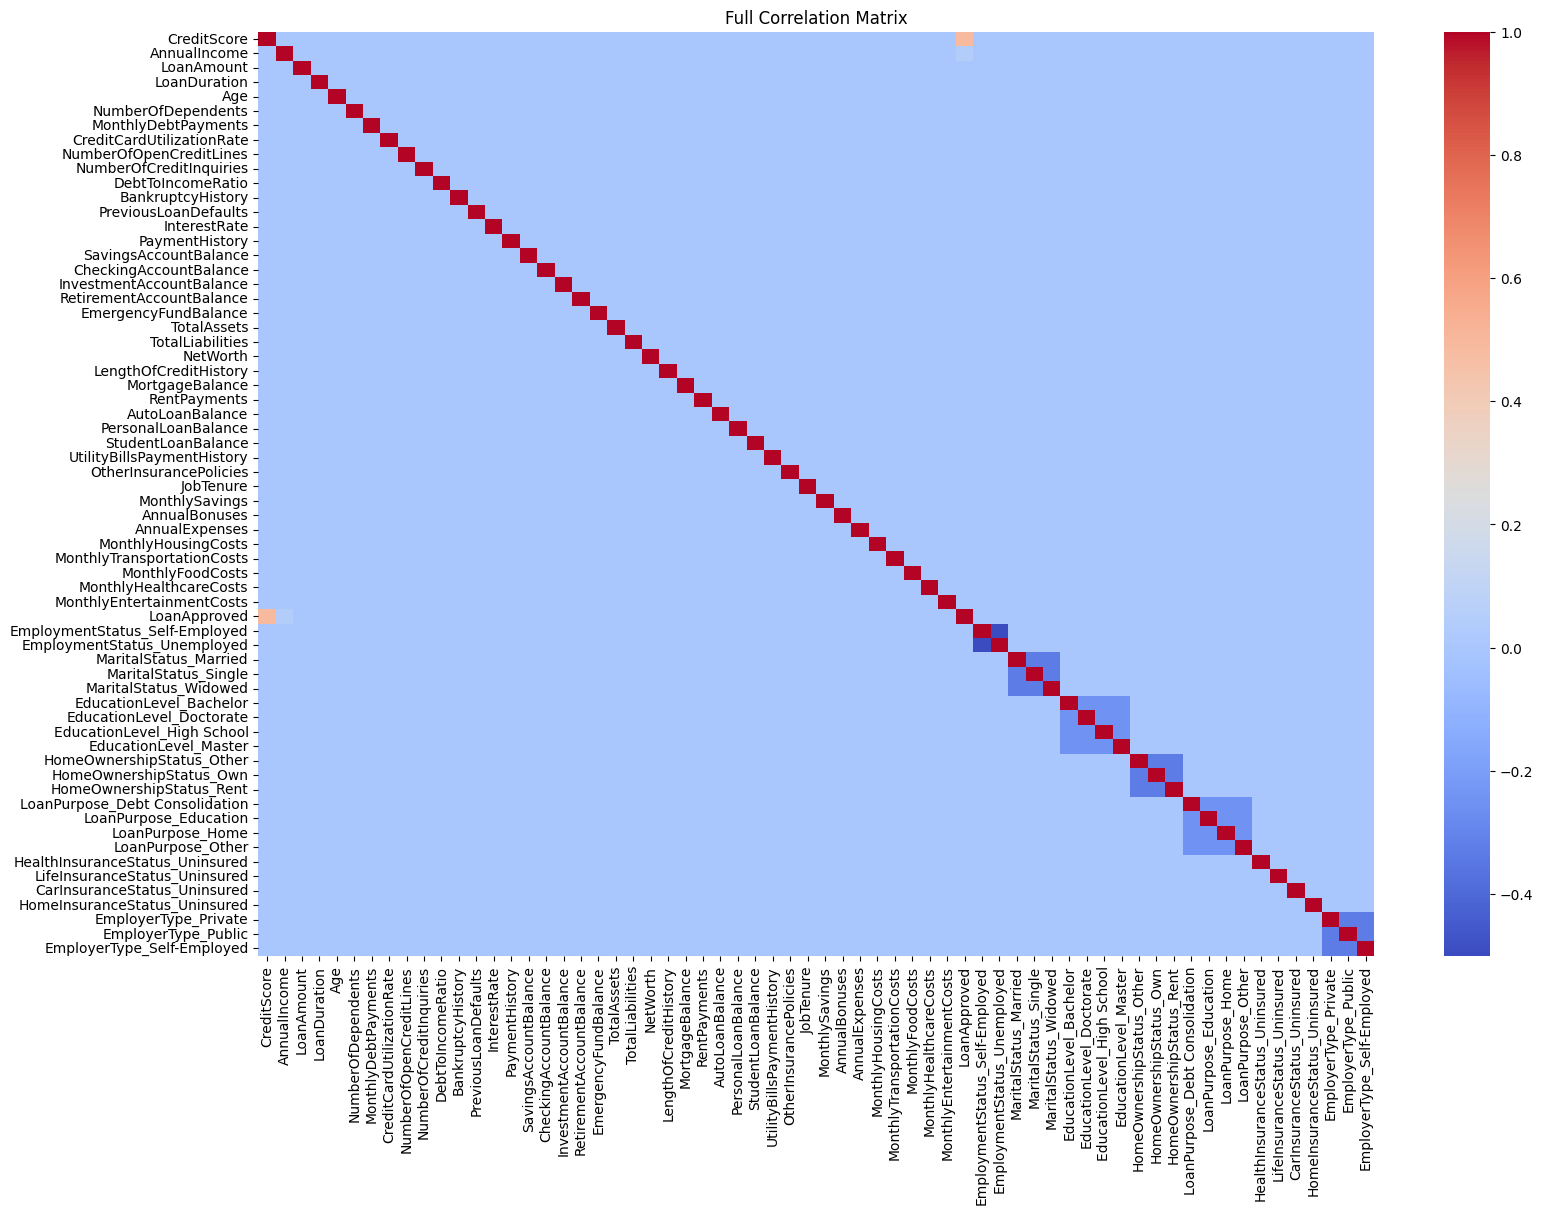

In [14]:
def plot_full_correlation_matrix(data):
    # Encode categorical variables before computing correlations
    encoded_data = pd.get_dummies(data, drop_first=True)
    corr_matrix = encoded_data.corr()
    plt.figure(figsize=(18, 12))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Full Correlation Matrix')
    plt.show()

plot_full_correlation_matrix(data_cleaned)

# Feature Engineering

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering
def create_feature_engineering(data_cleaned):
    # Example feature engineering
    data_cleaned['TotalDebt'] = data_cleaned['MortgageBalance'] + data_cleaned['AutoLoanBalance'] + data_cleaned['PersonalLoanBalance'] + data_cleaned['StudentLoanBalance']
    data_cleaned['SavingsToDebtRatio'] = np.where(data_cleaned['TotalDebt'] == 0, 0, data_cleaned['SavingsAccountBalance'] / data_cleaned['TotalDebt'])
    data_cleaned['MonthlyIncomeToDebtRatio'] = np.where(data_cleaned['MonthlyDebtPayments'] == 0, 0, data_cleaned['AnnualIncome'] / (12 * data_cleaned['MonthlyDebtPayments']))
    return data_cleaned

# Apply feature engineering
data_cleaned = create_feature_engineering(data_cleaned)

C:\Users\SOL-62\AppData\Local\Temp\ipykernel_5824\4009651462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalDebt'] = data_cleaned['MortgageBalance'] + data_cleaned['AutoLoanBalance'] + data_cleaned['PersonalLoanBalance'] + data_cleaned['StudentLoanBalance']
C:\Users\SOL-62\AppData\Local\Temp\ipykernel_5824\4009651462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['SavingsToDebtRatio'] = np.where(data_cleaned['TotalDebt'] == 0, 0, data_cleaned['SavingsAccountBalance

# Data Preprocessing

In [23]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


# Drop rows with missing values and duplicates
data_cleaned = data_cleaned.dropna()
data_cleaned = data_cleaned.drop_duplicates()

# Define numerical and categorical features
numerical_features = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age', 
                       'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
                       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 
                       'InterestRate', 'SavingsAccountBalance', 'CheckingAccountBalance', 
                       'InvestmentAccountBalance', 'RetirementAccountBalance', 
                       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 
                       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments', 
                       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance', 
                       'UtilityBillsPaymentHistory', 'MonthlySavings', 'AnnualBonuses', 
                       'AnnualExpenses', 'MonthlyHousingCosts', 'MonthlyTransportationCosts', 
                       'MonthlyFoodCosts', 'MonthlyHealthcareCosts', 'MonthlyEntertainmentCosts', 
                       'TotalDebt', 'SavingsToDebtRatio', 'MonthlyIncomeToDebtRatio']

categorical_features = ['EmploymentStatus', 'MaritalStatus', 'EducationLevel', 
                        'HomeOwnershipStatus', 'LoanPurpose', 'HealthInsuranceStatus', 
                        'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 
                        'OtherInsurancePolicies', 'EmployerType']

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable
X = data_cleaned.drop('LoanApproved', axis=1)  # Features
y = data_cleaned['LoanApproved']  # Target variable

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Convert target variable to numeric if it's not already
y = y.astype(np.float32)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model Training

## Dense Neural Network

In [20]:
pip install -q tensorflow --timeout=1000

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Verify installation
import tensorflow as tf
print(tf.__version__)

2.17.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


C:\Users\SOL-62\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
12405/12405 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7245 - loss: 0.4642 - val_accuracy: 0.7458 - val_loss: 0.4305
Epoch 2/5
12405/12405 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.7464 - loss: 0.4303 - val_accuracy: 0.7462 - val_loss: 0.4306
Epoch 3/5
12405/12405 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.7481 - loss: 0.4274 - val_accuracy: 0.7476 - val_loss: 0.4262
Epoch 4/5
12405/12405 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7500 - loss: 0.4254 - val_accuracy: 0.7470 - val_loss: 0.4268
Epoch 5/5
12405/12405 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7498 - loss: 0.4250 - val_accuracy: 0.7482 - val_loss: 0.4250


## Model Evaluation

3877/3877 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
Accuracy: 0.7481

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75     77971
         1.0       0.60      0.99      0.74     46077

    accuracy                           0.75    124048
   macro avg       0.79      0.80      0.75    124048
weighted avg       0.84      0.75      0.75    124048



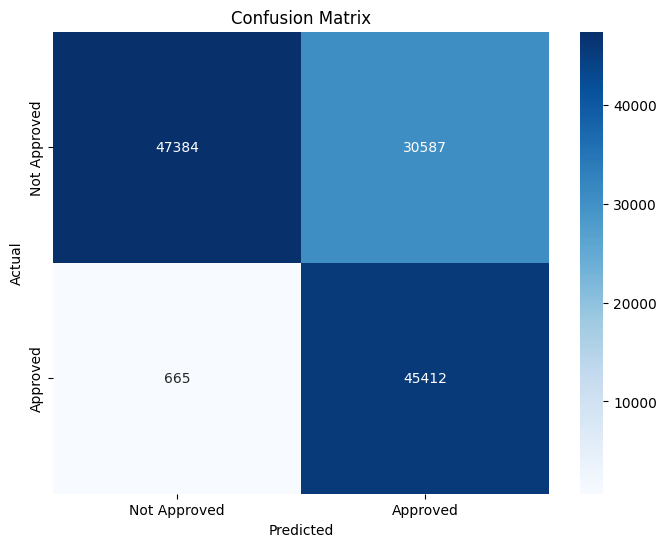

In [25]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary outcome

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Inference Pipeline

## Save the Model

In [26]:
# Save the model to a specific folder
model_save_path = 'C:\\Users\\SOL-62\\Desktop\\Financial Risk Analysis\\loan_approval_model.h5'
model.save(model_save_path)

## Create the Inference Pipeline

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd

# Load the saved model
model = load_model('C:\\Users\\SOL-62\\Desktop\\Financial Risk Analysis\\loan_approval_model.h5')

def preprocess_input(data):
    # Implement preprocessing steps here (e.g., scaling, encoding)
    # For example:
    # data = preprocessor.transform(data)
    return data

def predict_loan_approval(input_data):
    preprocessed_data = preprocess_input(input_data)
    predictions_prob = model.predict(preprocessed_data)
    predictions = (predictions_prob > 0.5).astype(int)
    return predictions
